In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, plotly.express as px, json
from urllib.request import urlopen

sns.set_style("darkgrid")
plt.style.use('ggplot')

In [3]:
sales = pd.read_excel(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\supermarkt_sales.xlsx", engine='openpyxl', usecols='B:R', skiprows=3)

sales.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2021-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2021-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2021-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2021-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2021-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [5]:
sales['Time'] = pd.to_datetime(sales['Time'], format='%H:%M:%S').dt.hour

sales.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2021-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2021-03-08,10,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2021-03-03,13,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2021-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2021-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3


# **`Nulls`**

In [6]:
print("Null percentage per Column.")

for i in sales.columns:
    print(f"{i} : {sales[sales[i].isnull()].shape[0] / sales.shape[0] * 100}%")

Null percentage per Column.
Invoice ID : 0.0%
Branch : 0.0%
City : 0.0%
Customer_type : 0.0%
Gender : 0.0%
Product line : 0.0%
Unit price : 0.0%
Quantity : 0.0%
Tax 5% : 0.0%
Total : 0.0%
Date : 0.0%
Time : 0.0%
Payment : 0.0%
cogs : 0.0%
gross margin percentage : 0.0%
gross income : 0.0%
Rating : 0.0%


Observations:
- The whole dataframe is complete.

# **`Duplicates`**

In [7]:
sales[sales.duplicated(subset="Invoice ID")]

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


Observations:
- Any of the rows is duplicated.

# **`Univariable Analysis`**

### **`Total Sales`**

In [8]:
print(f"USD ${sales['Total'].sum():,.2f}")

USD $322,966.75


### **`Average Sales per Transaction`**

In [9]:
print(f"USD ${sales['Total'].mean():,.2f}")

USD $322.97


### **`Transactions by Branches`**

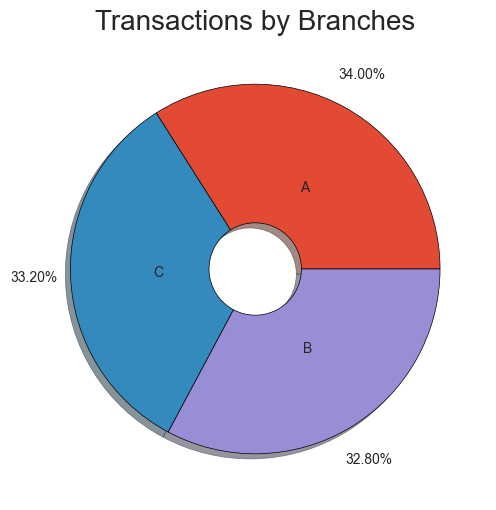

In [17]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Branch'].value_counts(),
    autopct='%.2f%%',
    pctdistance=1.2,
    labels=sales['Branch'].unique(),
    labeldistance=0.5,
    wedgeprops=dict(width=0.75, edgecolor='black'),
    shadow=True,
)

plt.title("Transactions by Branches", fontsize=20)
plt.show()

### **`Sales by City`**

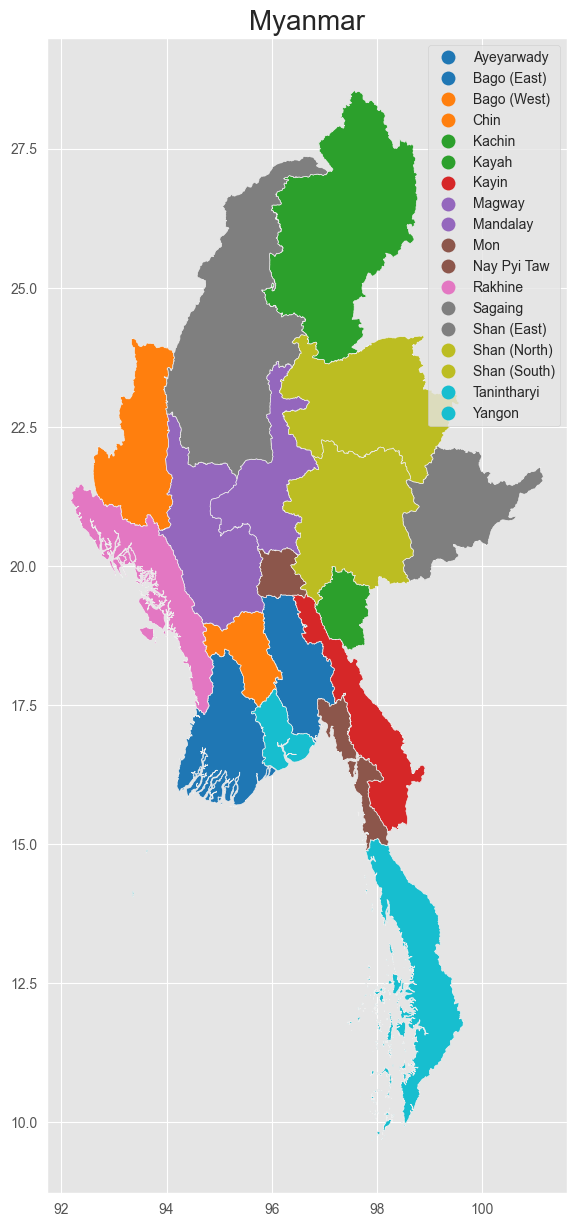

In [95]:
myanmar = gpd.read_file(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\state_region.geojson")

myanmar.plot('ST', legend=True, figsize=(15,15))

plt.title("Myanmar", fontsize=20)
plt.show()

### **`Sales by Customer Type`**

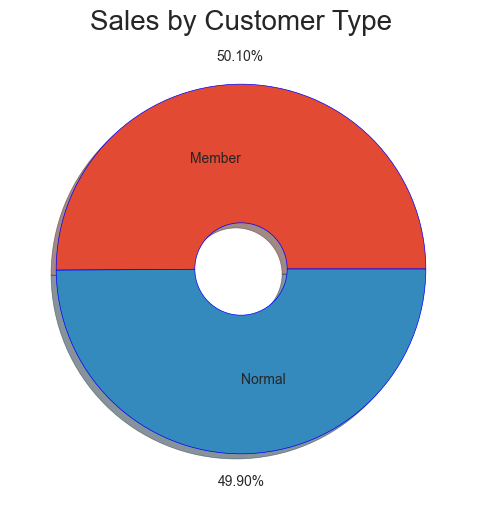

In [78]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Customer_type'].value_counts(),
    labels=sales['Customer_type'].unique(),
    labeldistance=0.6,
    autopct="%.2f%%",
    pctdistance=1.15,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Sales by Customer Type", fontsize=20)
plt.show()

### **`Transactions by Gender`**

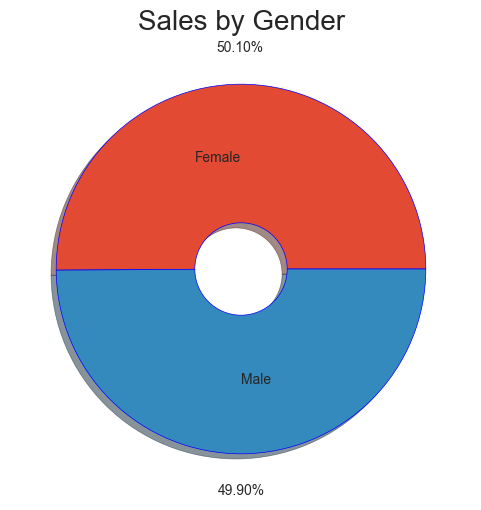

In [79]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Gender'].value_counts(),
    labels=sales["Gender"].unique(),
    autopct="%.2f%%",
    pctdistance=1.2,
    shadow=True,
    labeldistance=0.6,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Sales by Gender", fontsize=20)
plt.show()

### **`Transactions by Product Line`**

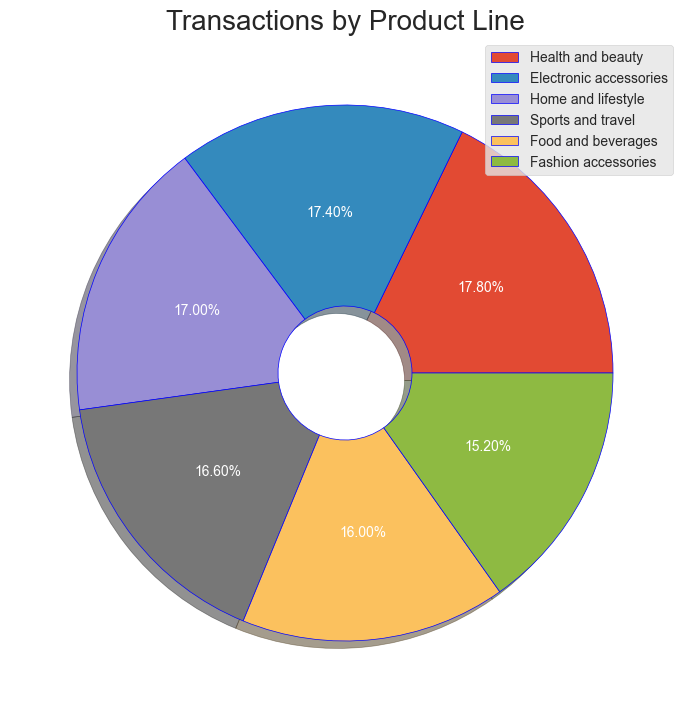

In [20]:
plt.figure(figsize=(10,7))

plt.pie(
    x=sales['Product line'].value_counts(),
    autopct="%.2f%%",
    pctdistance=0.6,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='b'),
    textprops=dict(color='w',)
)

plt.legend(sales['Product line'].unique())
plt.tight_layout()
plt.title("Transactions by Product Line", fontsize=20)
plt.show()

### **`Distribution of the Sales by Unit Price`**

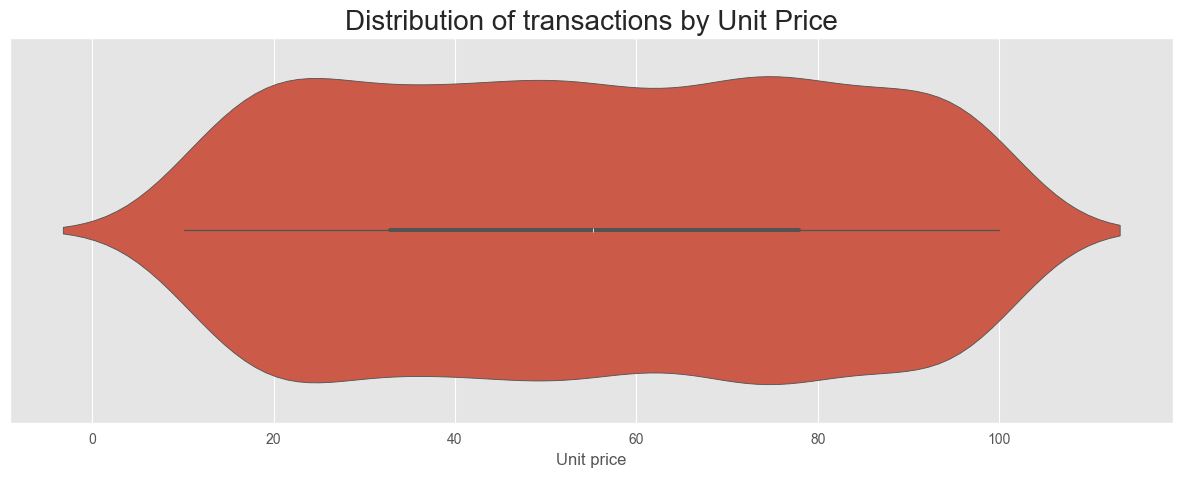

In [21]:
plt.figure(figsize=(15,5))

sns.violinplot(
    x=sales['Unit price']
)

plt.title("Distribution of transactions by Unit Price", fontsize=20)
plt.show()

### **`Distribution of the Sales by Quantity`**

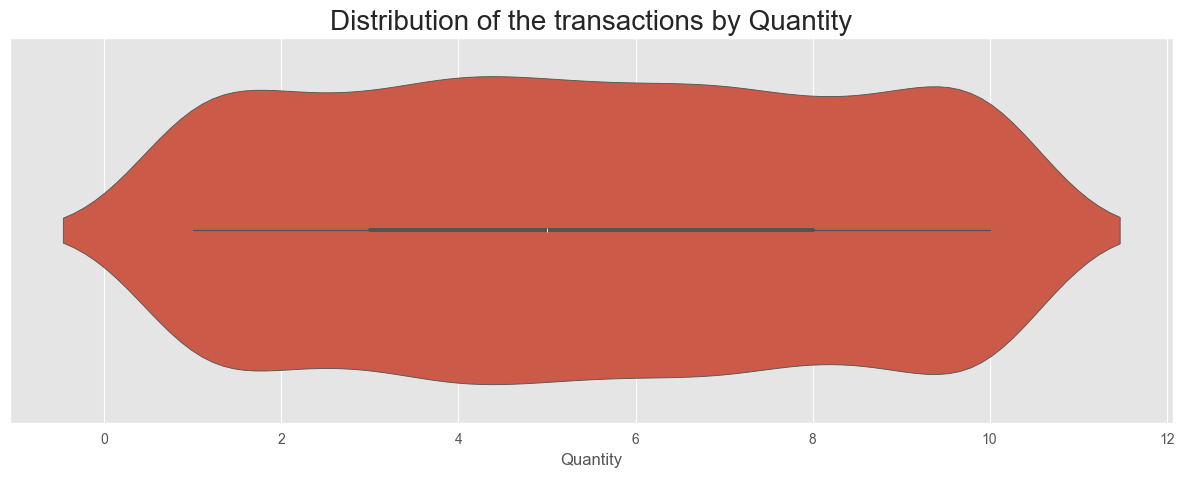

In [22]:
plt.figure(figsize=(15,5))

sns.violinplot(
    x=sales['Quantity']
)

plt.title("Distribution of the transactions by Quantity", fontsize=20)
plt.show()

### **`Total Sales by Date`**

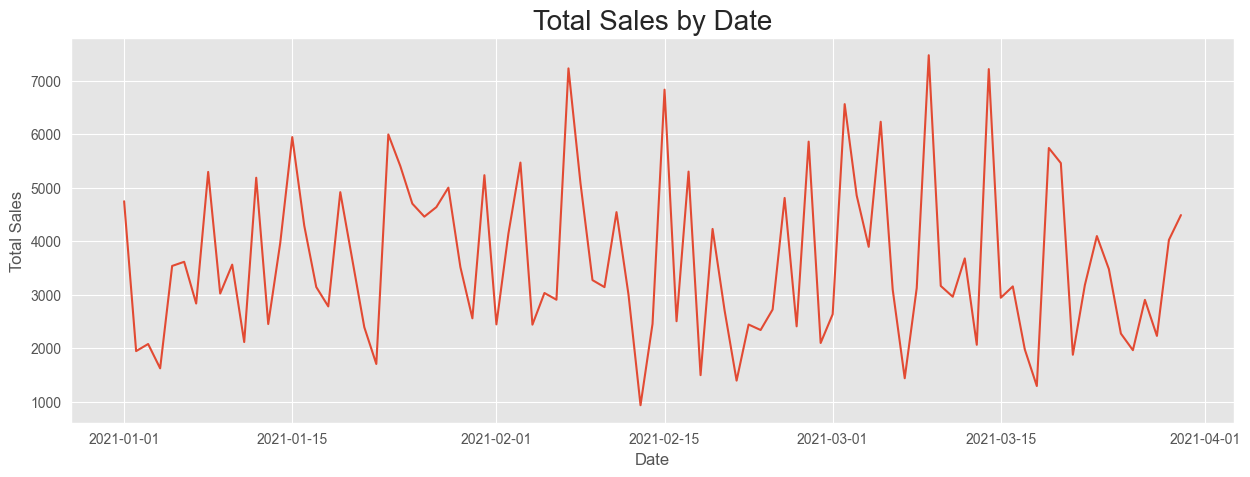

In [141]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales.groupby(by='Date')['Total'].sum()
)

plt.title("Total Sales by Date", fontsize=20)
plt.ylabel("Total Sales")
plt.show()

### **`Total Sales by Hour`**

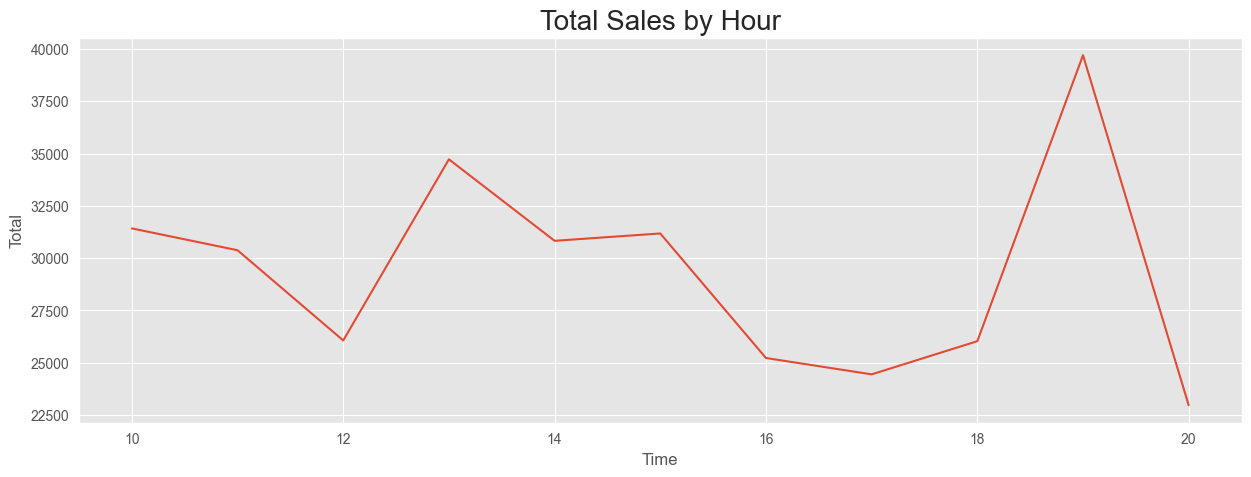

In [23]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales.groupby(by='Time')['Total'].sum()
)

plt.title("Total Sales by Hour", fontsize=20)
plt.ylabel("Total")
plt.show()

### **`Transactions by Payment`**

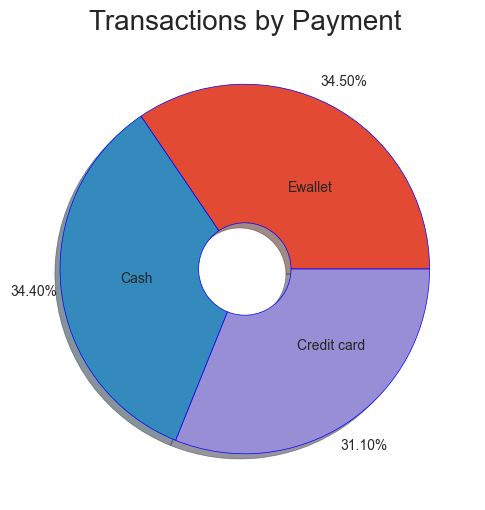

In [151]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Payment'].value_counts(),
    labels=sales['Payment'].unique(),
    autopct="%.2f%%",
    pctdistance=1.15,
    shadow=True,
    labeldistance=0.5,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Transactions by Payment", fontsize=20)
plt.show()

### **`Total Cost of Good Solds (cogs)`**

In [26]:
print(f"USD ${sales['cogs'].sum():,.2f}")

USD $307,587.38


### **`Average Gross Margin Percentage ((Net Sales - Cost of Good Sold) / Net Sales * 100)`**

In [29]:
print(f"%{sales['gross margin percentage'].mean():,.2f}")

%4.76


### **`Total Gross Income`**

In [30]:
print(f"USD ${sales['gross income'].sum():,.2f}")

USD $15,379.37


# **`Multivariable Analysis`**

In [50]:
sales[(sales['City'] == i)]['Branch'].value_counts().to_dict().keys()

dict_keys(['B'])

### **`Correlation Chart`**

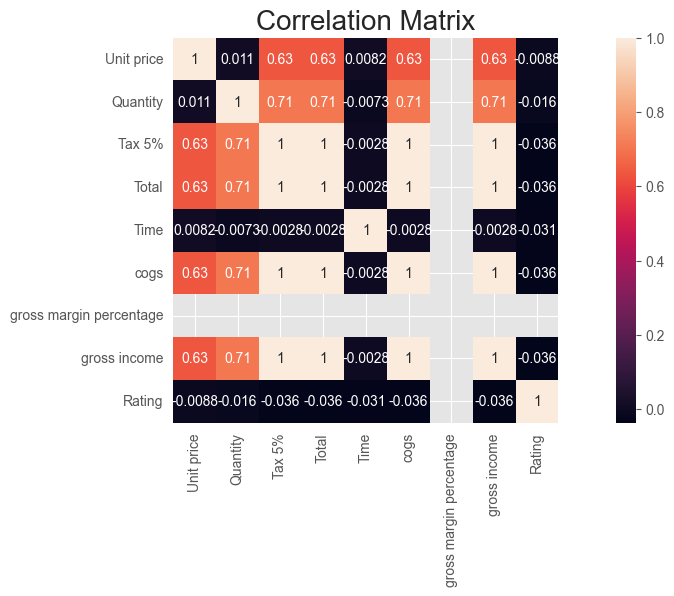

In [88]:
plt.figure(figsize=(15, 5))

sns.heatmap(
    data=sales.corr(numeric_only=True),
    cbar=True,
    square=True,
    annot=True,
)

plt.title("Correlation Matrix", fontsize=20)
plt.show()

### **`Branch`**

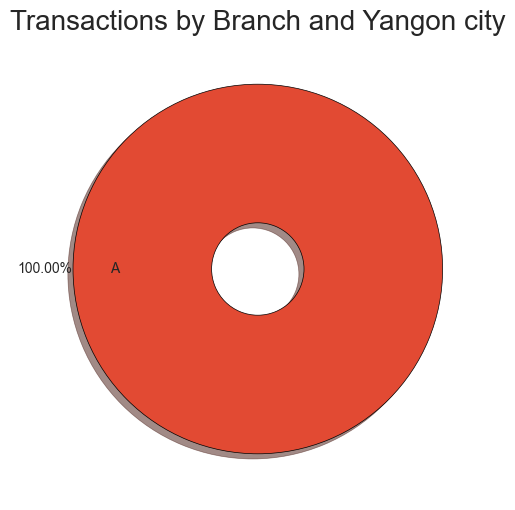

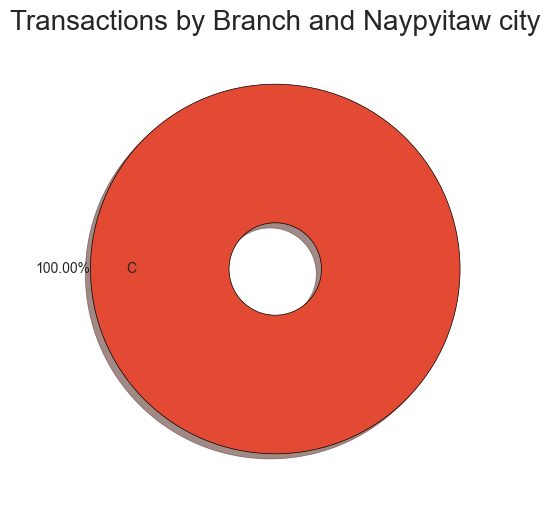

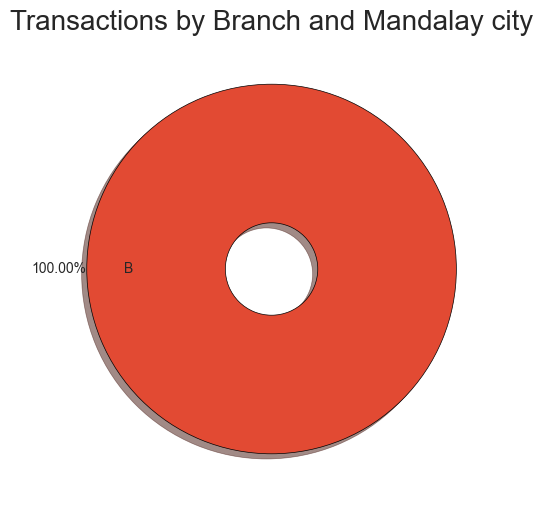

In [53]:
for i in sales['City'].unique():
    transactionsByBranchCity = sales[(sales['City'] == i)]['Branch'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(
        x=transactionsByBranchCity,
        labels=transactionsByBranchCity.keys(),
        autopct="%.2f%%",
        pctdistance=1.15,
        shadow=True,
        labeldistance=0.75,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i} city", fontsize=20)
    plt.show()

Options:
- Each of the brands are only located at the respective city

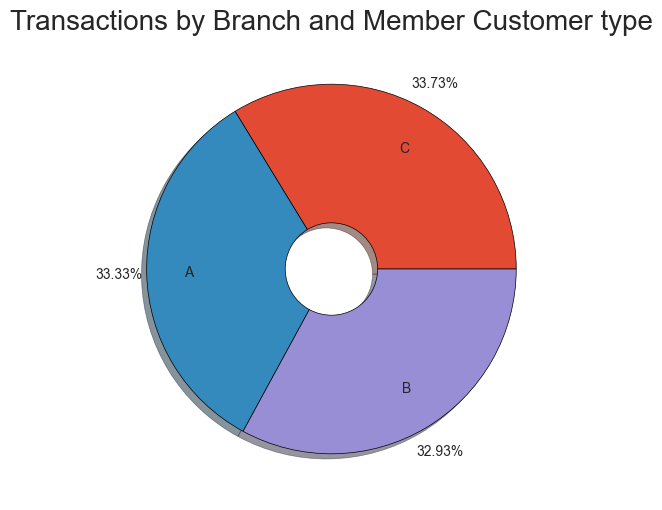

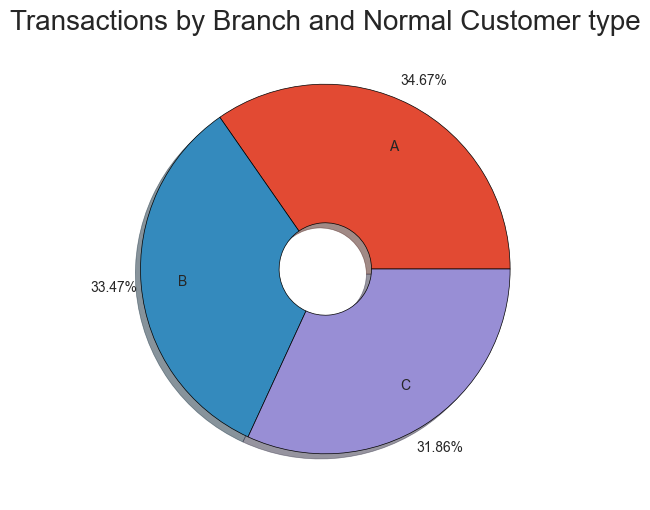

In [54]:
for i in sales['Customer_type'].unique():
    transactionsByBranchCustomerType = sales[(sales['Customer_type'] == i)]['Branch'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(
        x=transactionsByBranchCustomerType,
        labels=transactionsByBranchCustomerType.keys(),
        autopct="%.2f%%",
        pctdistance=1.15,
        shadow=True,
        labeldistance=0.75,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i} Customer type", fontsize=20)
    plt.show()

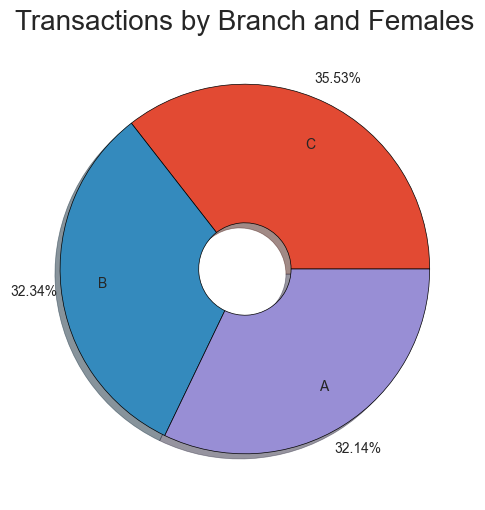

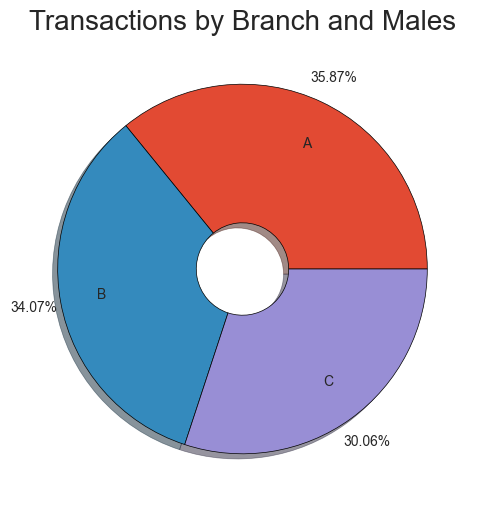

In [55]:
for i in sales['Gender'].unique():
    transactionsByBranchCustomerGender = sales[(sales['Gender'] == i)]['Branch'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(
        x=transactionsByBranchCustomerGender,
        labels=transactionsByBranchCustomerGender.keys(),
        autopct="%.2f%%",
        pctdistance=1.15,
        shadow=True,
        labeldistance=0.75,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i}s", fontsize=20)
    plt.show()

In [70]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')